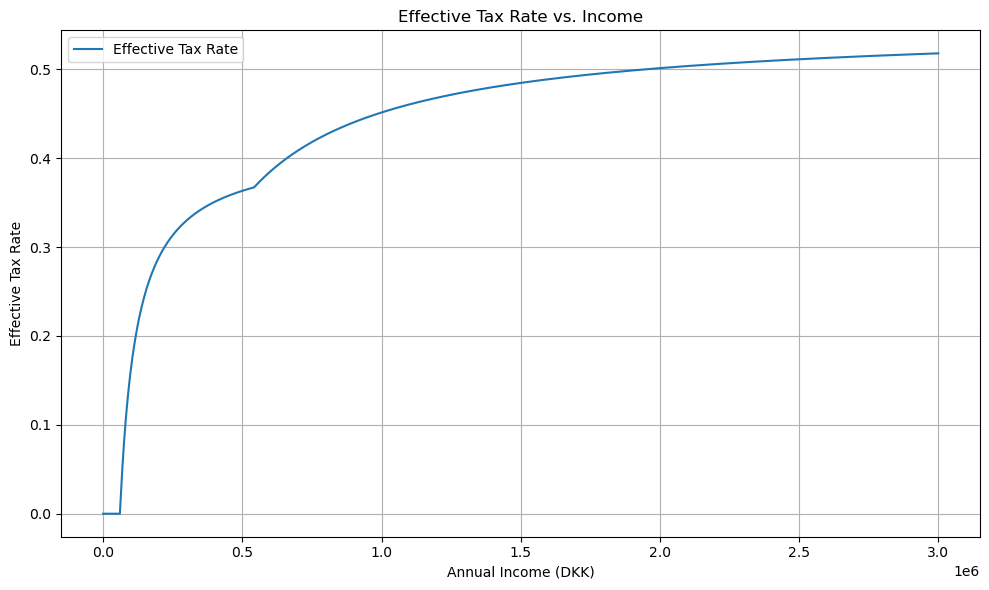

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants (same as the SAS code, simplified for loen = "ja")
am_sats                   = 0.08
beskfradrag_sats          = 0.875
bundskat_sats             = 0.113
topskat_sats              = 0.15
kommuneskat_sats          = 0.2491
personfradrag             = 46000
beskfradrag_graense       = 33300
topskat_graense           = 498900

def calculate_tax_rate(ind_aar):

    am_aar = ind_aar * am_sats
    personlignd_aar = (ind_aar - am_aar)
    grundlag_aar = max(personlignd_aar - personfradrag, 0)
    beskfradrag_aar = min(beskfradrag_graense, ind_aar * beskfradrag_sats)
    skattepligt_aar = (grundlag_aar - beskfradrag_aar)
    bundskat_aar = (grundlag_aar * bundskat_sats)
    topskat_aar = (topskat_sats * max(personlignd_aar - topskat_graense, 0))
    kommuneskat_aar = (kommuneskat_sats * skattepligt_aar)

    # Notice kirkeskat was never added to 'indkomstskat' in the original code
    indkomstskat_aar = (am_aar + bundskat_aar + topskat_aar + kommuneskat_aar)
    ind_efter_aar = (ind_aar - indkomstskat_aar)

    # Effective tax rate
    skatteprocent_aar = max(1 - (ind_efter_aar / ind_aar), 0)
    return skatteprocent_aar


incomes = np.linspace(1, 3000000, 1000)
tax_rates = []

tax_rates = [calculate_tax_rate(x) for x in incomes]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(incomes, tax_rates, label="Effective Tax Rate")
plt.xlabel("Annual Income (DKK)")
plt.ylabel("Effective Tax Rate")
plt.title("Effective Tax Rate vs. Income")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()